In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\sonu kumar\\Desktop\\dataframe_.csv")

In [3]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [4]:
df.shape

(1697, 2)

In [5]:
df.isnull().sum()

input     1
output    1
dtype: int64

In [6]:
l=np.where(df.isna())
print(l)

(array([1439, 1439], dtype=int64), array([0, 1], dtype=int64))


In [7]:
#printing the location 
print(df.iloc[[1439]])

      input  output
1439    NaN     NaN


In [8]:
real_int = [i for i in range(len(df.iloc[0])) if type(df.iloc[0, i]) != str]
real_int

[0, 1]

In [9]:
for i in real_int:
    from sklearn.impute import SimpleImputer
    sim=SimpleImputer(missing_values=np.nan,strategy='mean')
    df.iloc[:,[i]]=sim.fit_transform(df.iloc[:,[i]])

In [10]:
df.isnull().sum()

input     0
output    0
dtype: int64

In [11]:
#printing the location 
print(df.iloc[[1439]])

         input     output
1439  1.159933 -34.088017


### So above we have fill the NanN with the mean.

## finding the outliers 

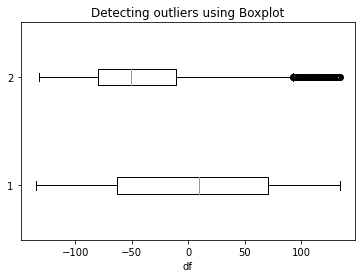

In [12]:
plt.boxplot(df, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('df')
plt.show()

In [13]:
def detect_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return np.where((x > upper_bound) | (x < lower_bound))

In [14]:
detect_outliers(df['input'])


(array([], dtype=int64),)

In [15]:
do=detect_outliers(df['output'])
print(do)

(array([ 339,  341,  342,  343,  345,  346,  347,  350,  351,  352,  353,
        354,  355,  356,  357,  358,  359,  360,  361,  362,  363,  453,
        456,  457,  460,  461,  462,  464,  465,  466,  467,  468,  470,
        471,  472,  473,  474,  475,  476,  477,  478,  479,  480,  481,
        482,  483,  484,  485,  486,  487,  488,  489,  490,  491,  492,
        493,  496,  498, 1038, 1043, 1044, 1046, 1048, 1050, 1052, 1053,
       1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064,
       1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075,
       1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086,
       1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097,
       1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108,
       1109, 1110, 1450, 1452, 1453, 1454, 1456, 1457, 1458, 1461, 1462,
       1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473,
       1474], dtype=int64),)


In [16]:
for x in ['output']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [17]:
df.isnull().sum()

input       0
output    144
dtype: int64

### there are 144 outlier we will remove all these..


In [18]:
 df=df. dropna()

In [19]:
df.isnull().sum()

input     0
output    0
dtype: int64

In [20]:
df.shape

(1553, 2)

### before sahpe was(1697,2) and now (1553,2) its becuse we have remove the outliers 1697-144=1533. 

In [21]:
X=df.loc[:,["input"]]
y=df.loc[:,["output"]]

In [22]:
print(X)

           input
0    -122.740667
1    -121.531419
2    -134.917019
3    -120.605951
4    -129.894781
...          ...
1692   25.410184
1693   29.537304
1694   31.633331
1695   29.091458
1696   17.145296

[1553 rows x 1 columns]


In [23]:
print(y)

          output
0    -130.572085
1    -129.938929
2    -130.141832
3    -125.760932
4    -112.785214
...          ...
1692  -76.380902
1693  -82.796934
1694  -87.000000
1695 -104.943052
1696 -101.726894

[1553 rows x 1 columns]


## descion tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values

lab = preprocessing.LabelEncoder()
y_t = lab.fit_transform(y)
clf = DecisionTreeClassifier(random_state=0).fit(X,y_t)

dec_score=clf.score(X, y_t)
print(dec_score)

0.9298132646490663


C:\Users\sonu kumar\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values

lab = preprocessing.LabelEncoder()
y_t = lab.fit_transform(y)
clf2 = KNeighborsClassifier(n_neighbors=3).fit(X, y_t)

knn_score=clf2.score(X, y_t)
print(knn_score)

C:\Users\sonu kumar\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7366387636831938


## SVM LINEAR

In [26]:
from sklearn import svm
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values

lab = preprocessing.LabelEncoder()
y_t = lab.fit_transform(y)


lin_clf3 = svm.SVC(kernel='linear')
lin_clf3.fit(X, y_t)

svml_score=lin_clf3.score(X, y_t)
print(svml_score)

C:\Users\sonu kumar\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.21506761107533806



# hence we can see that Decision Tree is best one modle with 0.9298132646490663 score. 

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values

lab = preprocessing.LabelEncoder()
y_t = lab.fit_transform(y)


clf5 = LogisticRegression(random_state=0).fit(X, y_t)

reg_score=clf5.score(X, y_t)
print(reg_score)

C:\Users\sonu kumar\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.021249195106245976


C:\Users\sonu kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
